
# Aula 2 - Estatística Descritiva

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Estatística Descritiva


___
___
___

In [40]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 1) Estatística Descritiva

Como mencionamos, o principal objetivo da estatística descritiva é gerar **medidas que resumam** o conjunto de dados que estamos analisando, ou seja, medidas que descrevam **a distribuição** dos dados, de forma quantitativa. Vamos dar uma olhada nessas medidas!

_______

### 1.1) Medidas de Posição

Estas são medidas que **resumem** algumas propriedades do conjunto de dados:

<img src="https://i.pinimg.com/originals/3e/8a/90/3e8a90c122ad25240cc46ac075cb0f4c.png" width=200>

#### 1.1.1) Média

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{X}$ como sendo :


$$\overline{X} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [41]:
np.random.seed(42)
amostra = np.random.randint(1, 20, 12)

print("Dados:", amostra)

print("\nMédia dos dados:", amostra.mean())

# podemos usar tb: np.mean(amostra) 
# ou ainda: sum(amostra)/len(amostra)

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Média dos dados: 8.833333333333334


In [42]:
sum(amostra)/len(amostra)

8.833333333333334

#### 1.1.1) Mediana

A **mediana** de uma variável é um número tal que há o mesmo número de observações maiores e menores do que ele, ocupando assim a **posição central** da série de observações.

Assim, para calcularmos a mediana, basta **ordenarmos os dados, do menor pro maior**, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")

- *Exemplo*

i) 3,4,**7**,8,80 **mediana=7**       (CASO ÍMPAR)

ii) 3,4,**7**,**8**,8,9 **mediana=(7+8)/2=7,5**   (CASO PAR)

Logo, podemos definir 

- - Mediana de $X = X_{\frac{n+1}{2}}$ `Se tamanho da amostra ímpar`


- - Mediana de $X = \frac{X_{\frac{n}{2}}+ X_{\frac{n+1}{2}}}{2}$ `Se tamanho da amostra par`

Como os valores de **indice no python** começam em `0`, devemos nos atentar que a equação acima deve ficar como:

- - Mediana de $X = X_{\frac{n}{2}}$ `Se tamanho da amostra ímpar`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}}+ X_{\frac{n}{2}}}{2}$ `Se tamanho da amostra par`

In [43]:
n = len(amostra)

n, int((n-1)/2) , int((n+1)/2)

(12, 5, 6)

In [44]:
(sorted(amostra)[int((n-1)/2)] + sorted(amostra)[int((n+1)/2)])/2

8.0

In [45]:
print("Dados:", amostra)

print("\nDados ordenados:", sorted(amostra))

print("\nMediana dos dados:", np.median(amostra))

# nesse caso, não tem o método .median(), tem que fazer da maneira acima!

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Mediana dos dados: 8.0


In [46]:
pd.Series(amostra).median()

8.0

#### 1.1.3) Quartis

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados **em quatro partes iguais**. 

- O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima;
- O segundo quartil, Q2 é a **mediana**, deixa 50% das observações abaixo e 50% das observações acima;
- O terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima;


<img src="https://aprendendogestao.com.br/wp-content/uploads/2016/07/QE-Figura-1.png" width="700" height="700" />

In [47]:
np.quantile(amostra, 0.1)

3.1

In [48]:
np.quantile(amostra, 0.9)

14.600000000000001

In [49]:
print("Dados:", amostra)

print("\nDados Ordenados:", sorted(amostra))

print("\nQ1:", np.quantile(amostra, 0.25))
print("\nQ2:", np.quantile(amostra, 0.50))
print("\nQ3:", np.quantile(amostra, 0.75))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados Ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Q1: 6.25

Q2: 8.0

Q3: 11.0


####  1.1.4) Intervalo Interquartílico (IQR - interquantile range)

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como **um intervalo de valores tipicamente assumidos pelas observações**, e também é uma **medida de dispersão**, pois nos dá uma ideia da variação que existe entre o Q1 e o Q3!


In [50]:
print("Dados:", amostra)

iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

print("\nIQR:", iqr)

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

IQR: 4.75


#### 1.1.5) Moda

A **moda** é o valor que ocorre com **maior frequencia** em um conjunto de dados 

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete 

- unimodal: Quando existe apenas um valor repetido com maior frequência 

- multimodal: quando existem mais de um valor com a mesma frequência máxima




In [51]:
amostra

array([ 7, 15, 11,  8,  7, 19, 11, 11,  4,  8,  3,  2])

In [52]:
pd.Series(amostra)

0      7
1     15
2     11
3      8
4      7
5     19
6     11
7     11
8      4
9      8
10     3
11     2
dtype: int32

In [53]:
pd.Series(amostra).mean()

8.833333333333334

In [54]:
pd.Series(amostra).median()

8.0

In [55]:
pd.Series(amostra).mode()

0    11
dtype: int32

In [56]:
print("Dados:", amostra)

# não existe método np.mode(), temos que transformar os dados em uma série
print("\nModa dos dados:", pd.Series(amostra).mode()[0])

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Moda dos dados: 11


In [57]:
amostra2 = np.array(list(amostra) + [7])

pd.Series(amostra2).mode()

0     7
1    11
dtype: int32

In [58]:
# amodal (no caso de nao ter moda mesmo) - cuidado com o pandas!

pd.Series([4, 5, 6, 7, 8, 9, 10]).mode()

0     4
1     5
2     6
3     7
4     8
5     9
6    10
dtype: int64

Se construirmos uma série do pandas, é possível ter as estatísticas descritivas todas de uma vez, com o describe():

In [59]:
amostra_serie = pd.Series(amostra)

print("Dados na forma de série:")
display(amostra_serie)

print("Estatísticas descritivas dos dados:")
display(amostra_serie.describe())

print("\nA moda fica de fora... Mas é fácil de obter:")
display(amostra_serie.mode())

Dados na forma de série:


0      7
1     15
2     11
3      8
4      7
5     19
6     11
7     11
8      4
9      8
10     3
11     2
dtype: int32

Estatísticas descritivas dos dados:


count    12.000000
mean      8.833333
std       4.932883
min       2.000000
25%       6.250000
50%       8.000000
75%      11.000000
max      19.000000
dtype: float64


A moda fica de fora... Mas é fácil de obter:


0    11
dtype: int32

____

### 1.2) Medidas de Dispersão

Estas são **medidas de variabilidade**, que indicam o quanto as observações variam ao redor de alguma medida de centralidade (média, mediana, etc.). 

Em outras palavras, indicam **o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável**. 

Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

#### 1.2.1) Amplitude

A amplitude é a **diferença entre o maior e o menor valor observado**. 

- **Fortemente influenciada** por valores extremos nas observações, como outliers. 

In [60]:
print("Dados:", amostra)
print("\nDados ordenados:", sorted(amostra))

print("\nAmplitude:", amostra.max()-amostra.min())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 19]

Amplitude: 17


In [61]:
amostra3 = np.array([2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 190])

print("Dados:", amostra3)
print("\nDados ordenados:", sorted(amostra3))

print("\nAmplitude:", amostra3.max()-amostra3.min())

Dados: [  2   3   4   7   7   8   8  11  11  11  15 190]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 15, 190]

Amplitude: 188


####  1.2.2) Variância 

A variância representa **o quanto os dados se afastam da média, em geral**. Por definição, tomamos a média dos **desvios quadráticos da média**:

$$ Var(X) = \sum_{i=1}^{n}\frac{(x_i-\overline{x})^{2}}{n}$$

In [62]:
amostra

array([ 7, 15, 11,  8,  7, 19, 11, 11,  4,  8,  3,  2])

In [63]:
amostra.mean()

8.833333333333334

In [64]:
((amostra - amostra.mean())**2).mean()

22.305555555555557

In [65]:
print("Dados:", amostra)

print("\nVariância:", np.var(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Variância: 22.305555555555557


####  1.2.3) Desvio padrão (std) - standard deviation

Note que, da forma como foi definida, a variância é um valor **quadrático** nos dados. Para evitar isso, é comum tirar a raiz quadrada da variância, o que define o **desvio padrão**:

$$ \sigma(X) \equiv \sqrt{Var(X)} = \sqrt{\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{2}}{n}}$$

In [66]:
np.sqrt(np.var(amostra))

4.722875771768251

In [67]:
print("Dados:", amostra)

print("\nDesvio Padrão:", np.std(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Desvio Padrão: 4.722875771768251


#### 1.2.4) Assimetria - skewness

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição.

Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**.

Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:

<img src="https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm" width=600>


- Distribuição assimétrica **Negativa ou enviesada a esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **Positiva ou enviesada a direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direita
- s < 0: assimetria à esquerda

In [68]:
print("Dados:", amostra)

print("\nSkewness:", pd.Series(amostra).skew())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Skewness: 0.6106376977108375


<AxesSubplot:ylabel='Count'>

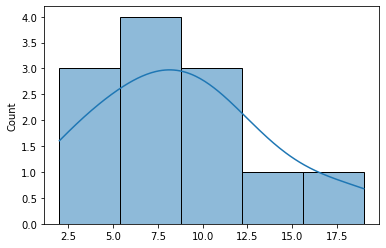

In [69]:
sns.histplot(amostra, kde=True)

___


Opção: usar as funções estatísticas da biblioteca [scipy!](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

Para uma lista das funções estatísticas disponíveis, [clique aqui!](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)

___

### 1.3) Tabelas de Frequência

A distribuição de frequências é um agrupamento de dados em classes, de tal forma que contabilizamos o número de ocorrências em cada classe.

O objetivo é apresentar os dados de uma maneira mais concisa e que nos permita extrair informação sobre seu comportamento. A seguir, apresentamos algumas definições necessárias à construção da distribuição de frequências.

**Frequência absoluta (ƒi):** É o número de observações correspondente a cada classe. A frequência absoluta é, geralmente, chamada apenas de frequência.

**Frequência relativa (ƒri):** É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências (total observado), isto é, $ \displaystyle f_{ri}=\frac{f_i}{\sum_{j}f_j} $ onde n representa o número total de observações.

**Frequência percentual (pi):** É obtida multiplicando a frequência relativa por 100%.

In [70]:
# como exemplo, vamos usar a base do titanic

df = pd.read_csv("../datasets/titanic.csv")

In [71]:
print("Tabela de frequência ABSOLUTA da coluna 'Survived':")

display(df["Survived"].value_counts())

Tabela de frequência ABSOLUTA da coluna 'Survived':


0    549
1    342
Name: Survived, dtype: int64

In [72]:
print("Tabela de frequência RELATIVA da coluna 'Survived':")

display(df["Survived"].value_counts(normalize=True))

Tabela de frequência RELATIVA da coluna 'Survived':


0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [73]:
print("Tabela de frequência PERCENTUAL da coluna 'Survived':")

display(df["Survived"].value_counts(normalize=True)*100)

# se quiser colocar as porcentagens, tem que transformar em string, e concatenar com o "%"
display(df["Survived"].value_counts(normalize=True).apply(lambda x: str(round(x*100, 2)) + "%"))

# se quiser colocar as porcentagens, tem que transformar em string, e concatenar com o "%"
display(df["Survived"].value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100)))

Tabela de frequência PERCENTUAL da coluna 'Survived':


0    61.616162
1    38.383838
Name: Survived, dtype: float64

0    61.62%
1    38.38%
Name: Survived, dtype: object

0    61.62%
1    38.38%
Name: Survived, dtype: object

Vamos analisar os dados de idade...

In [74]:
print("Média de idades:", df["Age"].mean())
print("Desvio padrão de idades:", df["Age"].std())

print("\nIdade mínima:", df["Age"].min())

print("\nIdade Q1:", df["Age"].quantile(0.25))
print("Mediana de idades:", df["Age"].median())
print("Idade Q3:", df["Age"].quantile(0.75))
print("IQR das idades:", df["Age"].quantile(0.75) - df["Age"].quantile(0.25))

print("\nIdade máxima:", df["Age"].max())

print("\nSkewness das idades:", df["Age"].skew())

print("\nIdade(s) mais comum(s):")
display(df["Age"].mode())

Média de idades: 29.69911764705882
Desvio padrão de idades: 14.526497332334044

Idade mínima: 0.42

Idade Q1: 20.125
Mediana de idades: 28.0
Idade Q3: 38.0
IQR das idades: 17.875

Idade máxima: 80.0

Skewness das idades: 0.38910778230082704

Idade(s) mais comum(s):


0    24.0
dtype: float64

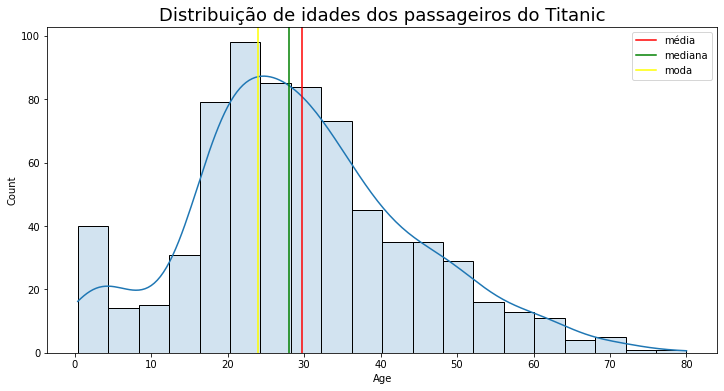

In [75]:
plt.figure(figsize=(12, 6))

plt.title("Distribuição de idades dos passageiros do Titanic", size=18)

sns.histplot(df["Age"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df["Age"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["Age"].median(), color="green", label="mediana")

# plotando a(s) moda(s)
# plota apenas se tiver até 5 modas
# pra cima disso, ficaria dificil de visualizar
if df["Age"].mode().shape[0] <= 5:

    for i in range(df["Age"].mode().shape[0]):

        plt.axvline(df["Age"].mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

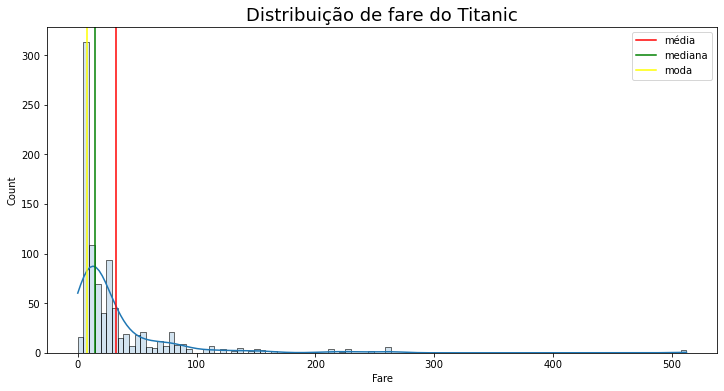

In [76]:
plt.figure(figsize=(12, 6))

plt.title("Distribuição de fare do Titanic", size=18)

sns.histplot(df["Fare"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df["Fare"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["Fare"].median(), color="green", label="mediana")

# plotando a(s) moda(s)
# plota apenas se tiver até 5 modas
# pra cima disso, ficaria dificil de visualizar
if df["Fare"].mode().shape[0] <= 5:

    for i in range(df["Fare"].mode().shape[0]):

        plt.axvline(df["Fare"].mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

____

### 1.4) Boxplot

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes **whiskers** inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

Limite inferior: $ \max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\} $.

Limite superior: $ \min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\} $.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<img src=https://miro.medium.com/max/8000/1*0MPDTLn8KoLApoFvI0P2vQ.png width=500>

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

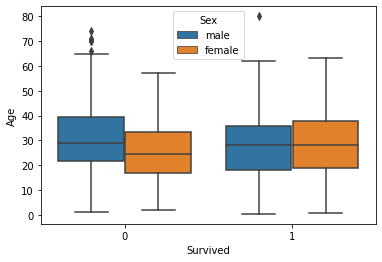

In [77]:
sns.boxplot(data=df, y="Age", x="Survived", hue="Sex")

In [80]:
df.groupby(["Survived", "Sex"])[["Age"]].median()

Age
Survived Sex         
0        female  24.5
         male    29.0
1        female  28.0
         male    28.0

In [96]:
df["Age"].dropna().isnull().sum()

0

In [97]:
x = df["Age"].dropna()

In [98]:
np.quantile(x, 0.25)

20.125

In [99]:
x.quantile(0.25)

20.125

In [100]:
np.mean(x)

29.69911764705882

In [101]:
x.mean()

29.69911764705882

In [102]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

df.groupby(["Survived", "Sex"])[["Age"]].agg(["mean", q1, "median", q3])

Age                     
                      mean     q1 median     q3
Survived Sex                                   
0        female  25.046875  16.75   24.5  33.25
         male    31.618056  21.75   29.0  39.25
1        female  28.847716  19.00   28.0  38.00
         male    27.276022  18.00   28.0  36.00

<AxesSubplot:xlabel='Survived', ylabel='Age'>

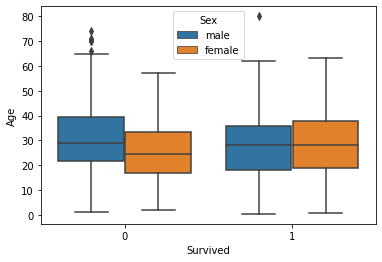

In [104]:
sns.boxplot(data=df, y="Age", x="Survived", hue="Sex")

In [ ]:
def q1(x):
    
    return x.quantile(0.25)

In [110]:
idades = df["Age"].dropna()

In [111]:
idades

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [113]:
q1(idades)

20.125

In [122]:
def q1(x):
    
    return x.quantile(0.25)


def q3(x):
    
    return x.quantile(0.75)


def iqr(x):
    
    return q3(x) - q1(x)


def whisker_min(x):
    
    return q1(x) - 1.5*iqr(x)


def whisker_max(x):
    
    return q3(x) + 1.5*iqr(x)


df.groupby(["Survived", "Sex"])[["Age"]].agg([whisker_min, q1, np.median, q3, whisker_max])

Age                                 
                whisker_min     q1 median     q3 whisker_max
Survived Sex                                                
0        female        -8.0  16.75   24.5  33.25        58.0
         male          -4.5  21.75   29.0  39.25        65.5
1        female        -9.5  19.00   28.0  38.00        66.5
         male          -9.0  18.00   28.0  36.00        63.0

In [119]:
df.groupby(["Survived", "Sex"])[["Age"]].groups

{(0, 'female'): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], (0, 'male'): [0, 4, 5, 6, 7, 12, 13, 16, 20, 26, 27, 29, 30, 33, 34, 35, 37, 42, 45, 46, 48, 50, 51, 54, 57, 59, 60, 62, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 80, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 99, 101, 102, 103, 104, 105, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 126, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 168, 169, 170, 171, 173, 174, 175, ...], (1, 'female'): [1, 2, 3, 8, 9, 10, 11, 15, 19, 22, 25, 28, 31, 32, 39, 43, 44, 47, 52, 53, 56, 58, 61, 66, 68, 79, 82, 84

In [118]:
df.loc[[14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 
        140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 
        264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419,
        423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578,
        593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 
        772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], "Age"]

14     14.0
18     31.0
24      8.0
38     18.0
40     40.0
       ... 
854    44.0
863     NaN
882    22.0
885    39.0
888     NaN
Name: Age, Length: 81, dtype: float64

In [124]:
df.loc[(df["Survived"] == 0) & (df["Sex"] == "female"), "Age"]

14     14.0
18     31.0
24      8.0
38     18.0
40     40.0
       ... 
854    44.0
863     NaN
882    22.0
885    39.0
888     NaN
Name: Age, Length: 81, dtype: float64

In [123]:
q1(df.loc[(df["Survived"] == 0) & (df["Sex"] == "female"), "Age"])

16.75

In [ ]:
idades = df["Age"].dropna()

In [114]:
idades

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [128]:
df.groupby(["Survived", "Sex"])[["Age"]].agg([whisker_min, q1, np.median, q3, whisker_max, 
                                              np.mean, np.std, np.min, np.max])

Age                                              \
                whisker_min     q1 median     q3 whisker_max       mean   
Survived Sex                                                              
0        female        -8.0  16.75   24.5  33.25        58.0  25.046875   
         male          -4.5  21.75   29.0  39.25        65.5  31.618056   
1        female        -9.5  19.00   28.0  38.00        66.5  28.847716   
         male          -9.0  18.00   28.0  36.00        63.0  27.276022   

                                        
                       std  amin  amax  
Survived Sex                            
0        female  13.618591  2.00  57.0  
         male    14.056019  1.00  74.0  
1        female  14.175073  0.75  63.0  
         male    16.504803  0.42  80.0

_____________

### 1.5) Outliers

**Outliers** ou **discrepantes** referem-se a obsevações **extremas**, que se deslocam em muito das outras observações em um conjunto de dados, ou seja, que **destoam do padrão da distribuição** dos dados.

Outliers podem existir por motivos diferentes, alguns dos quais são:

- erro na entrada de dados (erro humano);
- erro na medição/coleta dos dados (erro instrumental);
- erros experimentais (planejamento/execução dos experimentos);
- outliers naturais (não decorrente de erros)

No caso dos erros, é importante que os outliers sejam tratados (comumente são removidos).

Por outro lado, outliers naturais são importantes constituintes dos dados, de modo que não devem ser eliminados -- mas, muitas vezes, devem ser tratados.

De qualquer modo, antes de começarmos a pensar em como **tratar** os outliers, o primeiro passo é **identifica-los**. Para discussões interessantes sobre outliers, como identificá-los e tratá-los, dê uma olhada [neste post](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623) ou [neste](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561).

Aqui veremos as duas maneiras mais simples de identificar outliers:

In [129]:
idades

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [134]:
idades.mean()

29.69911764705882

In [135]:
idades.std()

14.526497332334044

In [131]:
z = (idades - idades.mean())/idades.std()

In [132]:
z.mean()

2.0039214607642444e-16

In [133]:
z.std()

0.9999999999999994

In [138]:
idades

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [140]:
idades.min()

0.42

In [142]:
idades.mean()

29.69911764705882

In [143]:
idades.mean() -2.015566*idades.std()

0.420003524915618

In [144]:
idades.max()

80.0

In [145]:
idades.mean() + 3.46269*idades.std()

79.99987469475859

In [139]:
z.describe()

count    7.140000e+02
mean     2.003921e-16
std      1.000000e+00
min     -2.015566e+00
25%     -6.590796e-01
50%     -1.169668e-01
75%      5.714304e-01
max      3.462699e+00
Name: Age, dtype: float64

In [151]:
idades[z[(z > 3) | (z< -3)].index]

630    80.0
851    74.0
Name: Age, dtype: float64

In [152]:
idades[z[z.abs() > 3].index]

630    80.0
851    74.0
Name: Age, dtype: float64

__1.5.1) Z-score (desvio padrão)__

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 1.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**

Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [154]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

In [155]:
df_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [156]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


In [180]:
# dê uma olhada nas estatísticas rápidas com o describe()
# responda: as variáveis numéricas parecem estar normalmente distribuídas?

display(df_wh.describe())

print("Parece que sim, pois a média e mediana são bem próximas!")

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Parece que sim, pois a média e mediana são bem próximas!


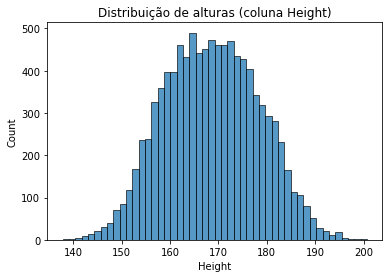

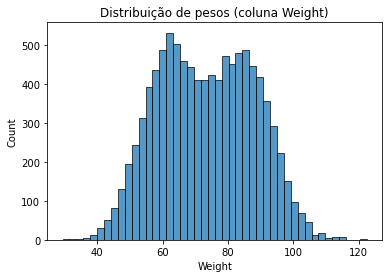

In [181]:
# vamos dar uma olhada na distribuição das variáveis "height" e "weight"

plt.title("Distribuição de alturas (coluna Height)")
sns.histplot(data=df_wh, x="Height")
plt.show()

plt.title("Distribuição de pesos (coluna Weight)")
sns.histplot(data=df_wh, x="Weight")
plt.show()

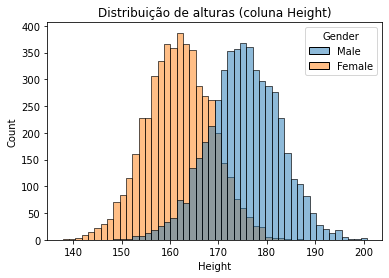

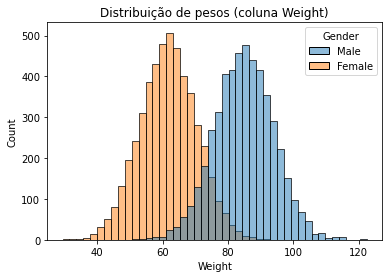

In [182]:
# talvez seja interessante aplicar o parâmetro "hue"

plt.title("Distribuição de alturas (coluna Height)")
sns.histplot(data=df_wh, x="Height", hue="Gender")
plt.show()

plt.title("Distribuição de pesos (coluna Weight)")
sns.histplot(data=df_wh, x="Weight", hue="Gender")
plt.show()

Vamos separar os dataframes por sexo

In [183]:
# crie dois dataframes, "male" (apenas de homens) e "female" (apenas de muheres),
# para olharmos as ditribuições separadamente

male = df_wh[df_wh["Gender"] == "Male"].copy()
female = df_wh[df_wh["Gender"] == "Female"].copy()

# obs: use o .copy() é pra garantir que não vai aparecer aquele erro chato de slicing!

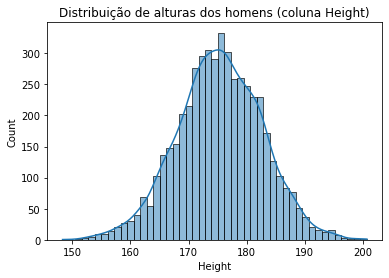

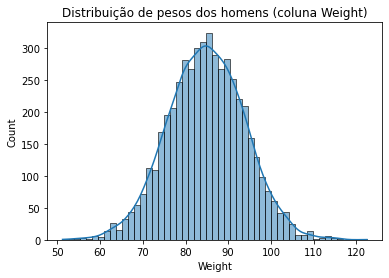

##########################################################


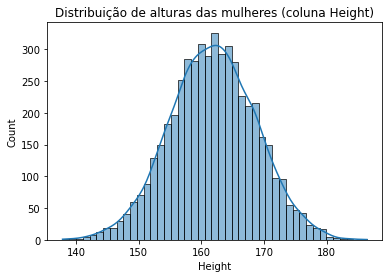

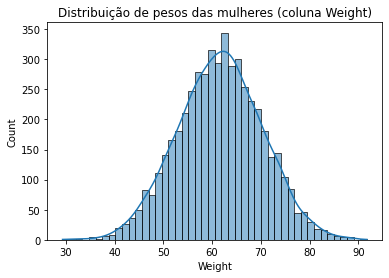

In [184]:
# agora, dê uma olhada nas distribuições separadamente

plt.title("Distribuição de alturas dos homens (coluna Height)")
sns.histplot(data=male, x="Height", kde=True)
plt.show()

plt.title("Distribuição de pesos dos homens (coluna Weight)")
sns.histplot(data=male, x="Weight", kde=True)
plt.show()

print("##########################################################")

plt.title("Distribuição de alturas das mulheres (coluna Height)")
sns.histplot(data=female, x="Height", kde=True)
plt.show()

plt.title("Distribuição de pesos das mulheres (coluna Weight)")
sns.histplot(data=female, x="Weight", kde=True)
plt.show()

Parece que as distribuições são aproximadamente normais!

In [198]:
# crie agora novas colunas "z_height" e "z_weight" em ambos os dataframes, 
# com o z score de cada observação para as respectivas variáveis

male["z_height"] = male["Height"].apply(lambda x: (x-male["Height"].mean())/male["Height"].std())
male["z_weight"] = male["Weight"].apply(lambda x: (x-male["Weight"].mean())/male["Weight"].std())

female["z_height"] = female["Height"].apply(lambda x: (x-female["Height"].mean())/female["Height"].std())
female["z_weight"] = female["Weight"].apply(lambda x: (x-female["Weight"].mean())/female["Weight"].std())

In [199]:
male

,Gender,Height,Weight,z_height,z_weight
0,Male,187.571423,109.722200,1.683570,2.774001
1,Male,174.706036,73.623547,-0.085369,-1.249176
2,Male,188.239668,96.498619,1.775451,1.300239
3,Male,182.196685,99.810610,0.944565,1.669359
4,Male,177.499761,93.599656,0.298757,0.977151
...,...,...,...,...,...
4995,Male,174.904559,80.346118,-0.058073,-0.499949
4996,Male,175.192494,72.251306,-0.018483,-1.402112
4997,Male,170.215039,90.354441,-0.702863,0.615474
4998,Male,181.756605,84.326367,0.884056,-0.056352


In [200]:
female

,Gender,Height,Weight,z_height,z_weight
5000,Female,149.633259,46.306961,-1.779502,-1.775362
5001,Female,165.684232,64.095901,0.564198,0.286279
5002,Female,160.957270,59.439990,-0.126014,-0.253316
5003,Female,163.779193,58.138216,0.286032,-0.404184
5004,Female,156.954464,58.868460,-0.710488,-0.319553
...,...,...,...,...,...
9995,Female,168.078536,62.041846,0.913805,0.048225
9996,Female,170.350573,77.505174,1.245559,1.840340
9997,Female,162.224700,58.276022,0.059051,-0.388213
9998,Female,175.346978,74.322989,1.975114,1.471542


In [201]:
# dê uma olhada nos outliers das variáveis altura e peso separadamente (considere |z| > 3)

print("Outliers homens apenas para a altura:")
display(male[male["z_height"].abs() > 3])

print("\nOutliers homens apenas para o peso:")
display(male[male["z_weight"].abs() > 3])

print("\n ############################################### \n")

print("Outliers mulheres apenas para a altura:")
display(female[female["z_height"].abs() > 3])

print("\nOutliers mulheres apenas para o peso:")
display(female[female["z_weight"].abs() > 3])

Outliers homens apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
994,Male,198.363503,115.980602,3.167438,3.471497
1238,Male,153.322811,60.848611,-3.025476,-2.672937
1317,Male,199.293614,103.121911,3.295324,2.038402
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2014,Male,200.656806,122.466524,3.482758,4.194350
2191,Male,152.244170,64.165644,-3.173785,-2.303255
2334,Male,150.826850,61.866554,-3.368661,-2.559487
2527,Male,153.083534,57.359890,-3.058376,-3.061753
2974,Male,153.078663,60.304898,-3.059046,-2.733533
3020,Male,152.951227,66.659097,-3.076568,-2.025361



Outliers homens apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
565,Male,156.855185,56.031998,-2.539789,-3.209746
994,Male,198.363503,115.980602,3.167438,3.471497
1506,Male,192.274490,113.202226,2.330223,3.161848
1610,Male,194.608567,116.058844,2.651149,3.480217
1750,Male,189.495857,113.374890,1.948172,3.181092
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2014,Male,200.656806,122.466524,3.482758,4.194350
2070,Male,196.762546,114.558963,2.947312,3.313056
2417,Male,160.411852,54.088205,-2.050762,-3.426381
2500,Male,155.129197,55.647334,-2.777105,-3.252616



 ############################################### 

Outliers mulheres apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
5103,Female,182.857792,80.452691,3.071814,2.181941
5345,Female,140.554691,40.082819,-3.105118,-2.496706
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7162,Female,183.971618,80.726450,3.234451,2.213669
7294,Female,139.379268,35.655752,-3.276749,-3.009779
7311,Female,186.409548,86.219146,3.590427,2.850242
7617,Female,140.077336,40.285046,-3.174820,-2.473269
7856,Female,183.552461,85.474601,3.173247,2.763953
8635,Female,183.105329,87.331427,3.107958,2.979149
9285,Female,137.828359,29.347785,-3.503207,-3.740838



Outliers mulheres apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
5360,Female,141.397233,31.290270,-2.982094,-3.515714
6258,Female,179.182537,88.953604,2.535168,3.167151
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7294,Female,139.379268,35.655752,-3.276749,-3.009779
7921,Female,179.397763,88.798539,2.566594,3.149180
7923,Female,177.679266,88.106850,2.315666,3.069017
7935,Female,147.857591,35.164553,-2.038778,-3.066706
8241,Female,142.664940,35.334555,-2.796988,-3.047004
8736,Female,180.214674,87.646705,2.685876,3.015688
8748,Female,179.570743,88.019962,2.591852,3.058947


In [202]:
# dê uma olhada nos outliers das variáveis altura e peso conjuntamente (considere |z| > 3)

print("Outliers homens para peso e altura:")
display(male[(male["z_height"].abs() > 3) & (male["z_weight"].abs() > 3)].sort_values("Height"))

print("\n ############################################### \n")

print("Outliers mulheres para peso e altura:")
display(female[(female["z_height"].abs() > 3) & (female["z_weight"].abs() > 3)].sort_values("Height"))

Outliers homens para peso e altura:


,Gender,Height,Weight,z_height,z_weight
4794,Male,148.353539,55.038702,-3.708731,-3.320448
4637,Male,152.064918,53.435472,-3.198432,-3.499127
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2527,Male,153.083534,57.359890,-3.058376,-3.061753
994,Male,198.363503,115.980602,3.167438,3.471497
3285,Male,199.461654,115.163297,3.318429,3.380409
2014,Male,200.656806,122.466524,3.482758,4.194350



 ############################################### 

Outliers mulheres para peso e altura:


,Gender,Height,Weight,z_height,z_weight
9285,Female,137.828359,29.347785,-3.503207,-3.740838
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7294,Female,139.379268,35.655752,-3.276749,-3.009779


____

__1.5.1) Boxplot whisker (IQR)__

Neste método, outliers são identificados como **os pontos que estão para além dos whiskers em um boxplot**.


Se você estiver interessado em saber porque os whiskers são definidios comumente com este fator 1.5 no "1.5\*IQR", dê uma olhada [neste post!](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [203]:
# calcule o IQR das variáveis numericas dos dois dataframes

q1_mh = male["Height"].quantile(0.25)
q3_mh = male["Height"].quantile(0.75)
iqr_mh = q3_mh - q1_mh

q1_mw = male["Weight"].quantile(0.25)
q3_mw = male["Weight"].quantile(0.75)
iqr_mw = q3_mw - q1_mw

print("IQR homens altura:", iqr_mh, "\tIQR homens peso:", iqr_mw)

print("\n############################################\n")

q1_fh = female["Height"].quantile(0.25)
q3_fh = female["Height"].quantile(0.75)
iqr_fh = q3_fh - q1_fh

q1_fw = female["Weight"].quantile(0.25)
q3_fw = female["Weight"].quantile(0.75)
iqr_fw = q3_fw - q1_fw

print("IQR mulheres altura:", iqr_fh, "\tIQR mulheres peso:", iqr_fw)

IQR homens altura: 9.687723994808579 	IQR homens peso: 12.00672887044486

############################################

IQR mulheres altura: 9.319574184704067 	IQR mulheres peso: 11.737653127823414


In [204]:
# calcule os whiskers das variaveis numericas dos dois datraframes

max_mh = q3_mh + 1.5*iqr_mh
min_mh = q1_mh - 1.5*iqr_mh

max_mw = q3_mw + 1.5*iqr_mw
min_mw = q1_mw - 1.5*iqr_mw

print("Whiskers homens altura: {:.2f} | {:.2f}".format(min_mh, max_mh))
print("Whiskers homens peso: {:.2f} | {:.2f}".format(min_mw, max_mw))

print("\n############################################\n")

max_fh = q3_fh + 1.5*iqr_fh
min_fh = q1_fh - 1.5*iqr_fh

max_fw = q3_fw + 1.5*iqr_fw
min_fw = q1_fw - 1.5*iqr_fw

print("Whiskers mulheres altura: {:.2f} | {:.2f}".format(min_fh, max_fh))
print("Whiskers mulheres peso: {:.2f} | {:.2f}".format(min_fw, max_fw))

Whiskers homens altura: 156.09 | 194.84
Whiskers homens peso: 60.86 | 108.89

############################################

Whiskers homens altura: 143.23 | 180.51
Whiskers homens peso: 38.16 | 85.11


<AxesSubplot:xlabel='Height'>

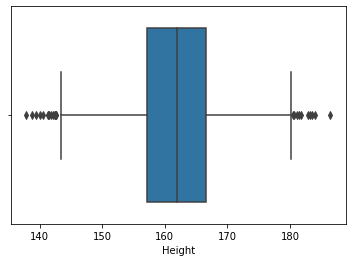

In [207]:
sns.boxplot(data=female, x="Height")

In [208]:
# dê uma olhada nos outliers das variáveis altura e peso separadamente 

print("Outliers homens apenas para a altura:")
display(male[(male["Height"] > max_mh) | (male["Height"] < min_mh)])

print("\nOutliers homens apenas para o peso:")
display(male[(male["Weight"] > max_mw) | (male["Weight"] < min_mw)])

print("\n######################################\n")

print("Outliers mulheres apenas para a altura:")
display(female[(female["Height"] > max_fh) | (female["Height"] < min_fh)])

print("\nOutliers mulheres apenas para o peso:")
display(female[(female["Weight"] > max_fw) | (female["Weight"] < min_fw)])

Outliers homens apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
426,Male,154.300219,61.765339,-2.891087,-2.570768
551,Male,154.126736,58.650560,-2.914940,-2.917908
912,Male,195.988434,103.740951,2.840875,2.107394
936,Male,155.249445,69.305602,-2.760572,-1.730409
994,Male,198.363503,115.980602,3.167438,3.471497
1238,Male,153.322811,60.848611,-3.025476,-2.672937
1317,Male,199.293614,103.121911,3.295324,2.038402
1339,Male,155.729428,68.183094,-2.694576,-1.855512
1442,Male,154.483487,62.494471,-2.865888,-2.489506
1577,Male,154.429169,58.237422,-2.873356,-2.963952



Outliers homens apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
0,Male,187.571423,109.722200,1.683570,2.774001
551,Male,154.126736,58.650560,-2.914940,-2.917908
565,Male,156.855185,56.031998,-2.539789,-3.209746
806,Male,157.679733,59.093384,-2.426417,-2.868556
994,Male,198.363503,115.980602,3.167438,3.471497
1238,Male,153.322811,60.848611,-3.025476,-2.672937
1506,Male,192.274490,113.202226,2.330223,3.161848
1577,Male,154.429169,58.237422,-2.873356,-2.963952
1610,Male,194.608567,116.058844,2.651149,3.480217
1651,Male,158.010425,59.347761,-2.380948,-2.840206



######################################

Outliers mulheres apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
5074,Female,142.645023,41.193530,-2.799896,-2.367981
5103,Female,182.857792,80.452691,3.071814,2.181941
5345,Female,140.554691,40.082819,-3.105118,-2.496706
5360,Female,141.397233,31.290270,-2.982094,-3.515714
5732,Female,142.439897,42.859645,-2.829848,-2.174887
5740,Female,142.516611,36.528740,-2.818647,-2.908604
6116,Female,181.454925,79.395578,2.866973,2.059428
6176,Female,141.862083,47.068465,-2.914218,-1.687108
6624,Female,138.726819,32.383992,-3.372017,-3.388958
6625,Female,141.578932,49.043803,-2.955563,-1.458177



Outliers mulheres apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
5214,Female,144.235003,38.099010,-2.567734,-2.726619
5360,Female,141.397233,31.290270,-2.982094,-3.515714
5662,Female,174.806437,85.590067,1.896187,2.777335
5740,Female,142.516611,36.528740,-2.818647,-2.908604
6258,Female,179.182537,88.953604,2.535168,3.167151
6624,Female,138.726819,32.383992,-3.372017,-3.388958
6687,Female,177.837685,85.556511,2.338798,2.773446
6982,Female,144.181719,35.913261,-2.575514,-2.979935
7294,Female,139.379268,35.655752,-3.276749,-3.009779
7311,Female,186.409548,86.219146,3.590427,2.850242


In [209]:
# dê uma olhada nos outliers das variáveis altura e peso conjuntamente

print("Outliers homens para peso e altura:")
display(male[((male["Height"] > max_mh) | (male["Height"] < min_mh)) & 
             ((male["Weight"] > max_mw) | (male["Weight"] < min_mw))].sort_values("Height"))

print("\n ############################################### \n")

print("Outliers mulheres para peso e altura:")
display(female[((female["Height"] > max_fh) | (female["Height"] < min_fh)) & 
               ((female["Weight"] > max_fw) | (female["Weight"] < min_fw))].sort_values("Height"))

Outliers homens para peso e altura:


,Gender,Height,Weight,z_height,z_weight
4794,Male,148.353539,55.038702,-3.708731,-3.320448
4637,Male,152.064918,53.435472,-3.198432,-3.499127
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2974,Male,153.078663,60.304898,-3.059046,-2.733533
2527,Male,153.083534,57.359890,-3.058376,-3.061753
1238,Male,153.322811,60.848611,-3.025476,-2.672937
551,Male,154.126736,58.650560,-2.914940,-2.917908
3332,Male,154.231542,56.077456,-2.900529,-3.204680
1577,Male,154.429169,58.237422,-2.873356,-2.963952
2500,Male,155.129197,55.647334,-2.777105,-3.252616



 ############################################### 

Outliers mulheres para peso e altura:


,Gender,Height,Weight,z_height,z_weight
9285,Female,137.828359,29.347785,-3.503207,-3.740838
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7294,Female,139.379268,35.655752,-3.276749,-3.009779
5360,Female,141.397233,31.290270,-2.982094,-3.515714
5740,Female,142.516611,36.528740,-2.818647,-2.908604
8241,Female,142.664940,35.334555,-2.796988,-3.047004
8635,Female,183.105329,87.331427,3.107958,2.979149
7856,Female,183.552461,85.474601,3.173247,2.763953
7311,Female,186.409548,86.219146,3.590427,2.850242


A relação entre os dois métodos acima pode ser compreendida na seguinte imagem:

<img src="https://miro.medium.com/max/700/1*J5Xm0X-phCJJ-DKZMZ_88w.png">

________________
________________
________________
________________
________________
________________
________________
________________

### Um pouco mais sobre a distribuição normal...

Como vimos, o z-score é uma medida extremamente útil. 

Quando normalizamos (padronizamos) uma variável, fica muito mais fácil de calcularmos **probabilidades** a partir da distribuição normal, a partir da área sob a curva.

Uma forma de visualizar isso é através da tabela normal padronizada!

#### Construindo tabela normal padronizada (tabela de z-score)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [161]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame([], 
                                        index=["{:.2f}".format(i/100) for i in range(0, 400, 10)],
                                        columns = ["{:.2f}".format(i/100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    
    for column in tabela_normal_padronizada.columns:
        
        Z = np.round(float(index) + float(column), 2)
        
        tabela_normal_padronizada.loc[index, column] = "{:.4f}".format(norm.cdf(Z))

tabela_normal_padronizada = tabela_normal_padronizada.rename_axis('Z', axis = 'columns')

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

In [213]:
female["Height"].mean()

161.82028495269938

In [214]:
female["Height"].std()

6.848561400043233

#### Exemplo: altura.

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

A distribuição que estamos trabalhando é tal que $\mu=1.7$ e $\sigma=0.1$

In [215]:
sigma = 0.1
mu = 1.7

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

Primeiro, obtemos a variável padronizada $Z$

In [216]:
z = (1.8 - mu) / sigma

z

1.0000000000000009

#### Solução 1 - Utilizando tabela

In [217]:
p = 0.8413

#### Solução 2 - Utilizando Scipy

In [218]:
from scipy.stats import norm

In [219]:
norm.cdf(z)

0.8413447460685431

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    


<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

#### Obtendo a variável padronizada $Z$

In [168]:
z1 = (1.6 - mu) / sigma

z1

-0.9999999999999987

In [167]:
z2 = (1.8 - mu) / sigma

z2

1.0000000000000009

In [169]:
norm.cdf(z1)

0.1586552539314574

In [170]:
norm.cdf(z2)

0.8413447460685431

In [172]:
norm.cdf(z2) - norm.cdf(z1)

0.6826894921370857


> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

#### Obtendo a variável padronizada $Z$

In [ ]:
pd.read_excel()

In [221]:
z = (1.9 - mu) / sigma

z

1.9999999999999996

In [222]:
norm.cdf(z)

0.9772498680518208

In [177]:
1 - norm.cdf(z)

0.02275013194817921

In [223]:
norm.sf(z)

0.022750131948179216

___
___
___